# Decision tree in ML

__a) Introduction:__

Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In depth explanation can be found [here](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)

__b) Working with Decision Tree Algorithm:__

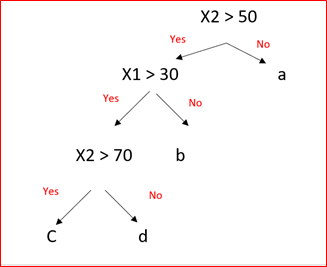

1) Suppose, we have a dataset and divide into 3 splits, split number 1, 2 and 3.

2) Let the values on X1 be 30, X2 values be 50,70

3) First split is across the value 50. So, the root value is x2> 50. It is divided into YES and NO again.

4) Average of all the values in the given area be 'a' (as shown in image), 'b', 'c' and 'd'

5) Split number 2 is X1 > 30. if NO, then b otherwise if YES, then X2 > 70

6) if X2 > 70, if NO means d and YES means c

7) SO, now this is final decesion tree.

__c) How this is helpful when we are predicting certain values.__

1) Suppose we are given testing inputs and we will check the coordinates X1X2 lie withing the region of a. Then we have to predict the value for this input.

2) Now, we have to use decesion tree . a) Is X2 > 50, if NO, then answer is a. And a is the average value of all the training inputs that was there when we were preparing the split. So, average of all the inputs will be assigned to this particular area => a

3) Suppose, we have another testing input area which is again having x1 and x2 values. And theses x1x2 values are lying in this particular area ==> d 
  a) Is x2 > 50, YES , then again, X1 > 30 If YES then answer is b. 
  b) Is X2 > 50, YES, then again, X1 > 30 If NO then CHECK if X2 > 70. 
     If NO, then d. If YES, then c.

This is how we predict values in decision tree algorithm. We construct a decision tree optimaly after choosing the optimal number of splits after performing all the mathematiclal steps over the training input.

__d) Final steps are:__

1) we get training input

2) find number of splits

3) construct our decision tree---> this construction of our decision tree is called our training of our model.

4) and when we predict our model, we use already trained model i.e. already built decision tree and we predict the values accordingly.

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

## Loading Data

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [3]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data['MEDV'] = boston_data.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**A little bit of data exploration**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing

### Checking no. of null values

In [9]:
print(data.isnull().sum())  

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Splitting data

In [10]:
x = data.drop(['MEDV'], axis =1)

y = data['MEDV']

In [11]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [20]:
# Splitting data to training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=101)

# print the shapes
print("Train Input Shape = {}".format(xtrain.shape))
print("Train Output  Shape = {}".format(ytrain.shape))
print("Test Input Shape = {}".format(xtest.shape))
print("Test Output  Shape = {}".format(ytest.shape))

Train Input Shape = (354, 13)
Train Output  Shape = (354,)
Test Input Shape = (152, 13)
Test Output  Shape = (152,)


# <font color = "green">Decision Tree Regression</font>

### Training Model

In [21]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Prediction

In [22]:
ypred = dtr.predict(xtest)

In [23]:
ypred

array([48.5, 33.4, 12.7, 13.8, 27.9, 33.4, 41.7, 19.9, 26.7,  5.6, 27.9,
       11.8, 21.7, 21.9, 22.8, 21.5,  7. , 26.6, 26.2, 21.4,  9.7, 23.7,
       21.1, 33.4, 23.9, 20.8, 30.1, 19.4, 50. , 33.3, 20.6, 19.3, 43.5,
       45.4, 27.5, 21.7, 16.7, 23. ,  7.4, 36.2, 24. , 19.6, 39.8,  9.7,
       19.1, 22.4, 23.6, 13.6, 28. , 23.6, 33.8, 41.7, 16.8, 23.1, 33.2,
       10.2, 18.3, 19.5, 22.5, 17.7, 36.4, 13.8, 24.3, 29.6,  9.5, 26.5,
       21.4, 19.7, 12.3, 21.1, 22.8, 24.5, 19.4, 23. , 22.9, 19.4, 43.5,
       19.4, 31.5, 12.3, 19.1, 20.2, 24.4, 14.1, 15.7, 22.6, 20.8, 23.9,
       21.7, 23.8, 12.3, 13.4, 22.6, 15. ,  6.3, 39.8, 17.8, 33.8, 12.1,
       22. , 33.8, 19.6, 23.2, 20.6, 22.7, 20.3, 21.4, 33.4, 41.7, 37. ,
       21.4, 41.7, 23.9, 21.4, 33.3, 22.6, 23.7, 27.9, 22.3, 22. , 13.5,
       21.4, 19.4, 30.5, 23.1, 20.2, 19.1, 10.5, 14.3, 22. , 23.1, 36.4,
       22. , 16.8, 27.5, 23.8, 30.1, 22.2, 37.6, 21.1, 11.8, 43.5, 23.6,
       19.4, 29.8, 23.1, 23.1, 21.4, 21.4, 22.9, 16

### Error

In [24]:
mean_squared_error(ypred, ytest)

22.238684210526316